# What contributed to loan default
## by Nuttapong Auetavonarnu

## Investigation Overview

In this investigation, I would like to look at what are key predictors whether borrower will be defaulted or not. The main focus was on Income range, Credit Grade, State, and debt to Income ratio.

## Dataset Overview

The dataset comprising of 113,937 loans with 81 variables on each loan, 
including loan amount, borrower rate (or interest rate), current loan status, borrower income etc.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# classified loan status as default and not default

df['LoanStatusReview'] = np.where(df.LoanStatus =='Defaulted','Defaulted','not Defaulted')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Credit grade vs loan default

Credit grade has been ploted separate by default vs not default borrower. The result showed that the higher the credit grade, the lower the defaul.

Text(0.5,1,'# of default by Credit Grade')

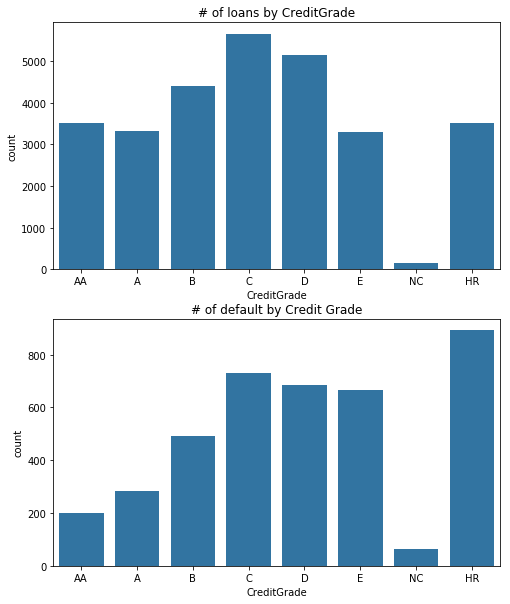

In [5]:
fig, ax = plt.subplots(nrows = 2, figsize = (8,10))

default_color = sns.color_palette()[0]

order_by = ['AA','A','B','C','D','E','NC','HR']

sns.countplot(data = df, x = 'CreditGrade', color = default_color, ax = ax[0], order = order_by)
ax[0].set_title('# of loans by CreditGrade')

sns.countplot(data = df[df.LoanStatusReview =='Defaulted'], x = 'CreditGrade', color = default_color, ax = ax[1], order = order_by)
ax[1].set_title('# of default by Credit Grade')

Text(0.5,1,'% Defaulted by Credit Grade')

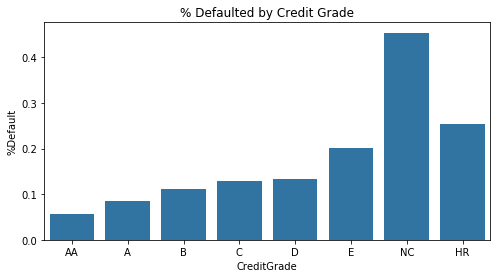

In [6]:
# add one column to separate defaulted and not defaulted

df['LoanStatusReview'] = np.where(df.LoanStatus =='Defaulted','Defaulted','not Defaulted')

credit_group = df.groupby(by=['CreditGrade','LoanStatusReview']).count()['ListingKey'].reset_index()

credit_format = credit_group.pivot(index = 'CreditGrade', columns = 'LoanStatusReview')['ListingKey'].reset_index()

credit_format['%Default'] = credit_format['Defaulted']/ (credit_format['Defaulted'] + credit_format['not Defaulted'])

plt.figure(figsize = (8,4))

sns.barplot(x = 'CreditGrade', y= '%Default', data = credit_format, order = order_by, color = default_color)

plt.title('% Defaulted by Credit Grade')

## State with highest and lowest default

Each state has different percentage of default. ND (Nevada) shows highest number of default almost 14%, while the lowest state seem to be SC (Sacramentol) with default rate less than 1%.

Text(0.5,1,'% Defaulted by state')

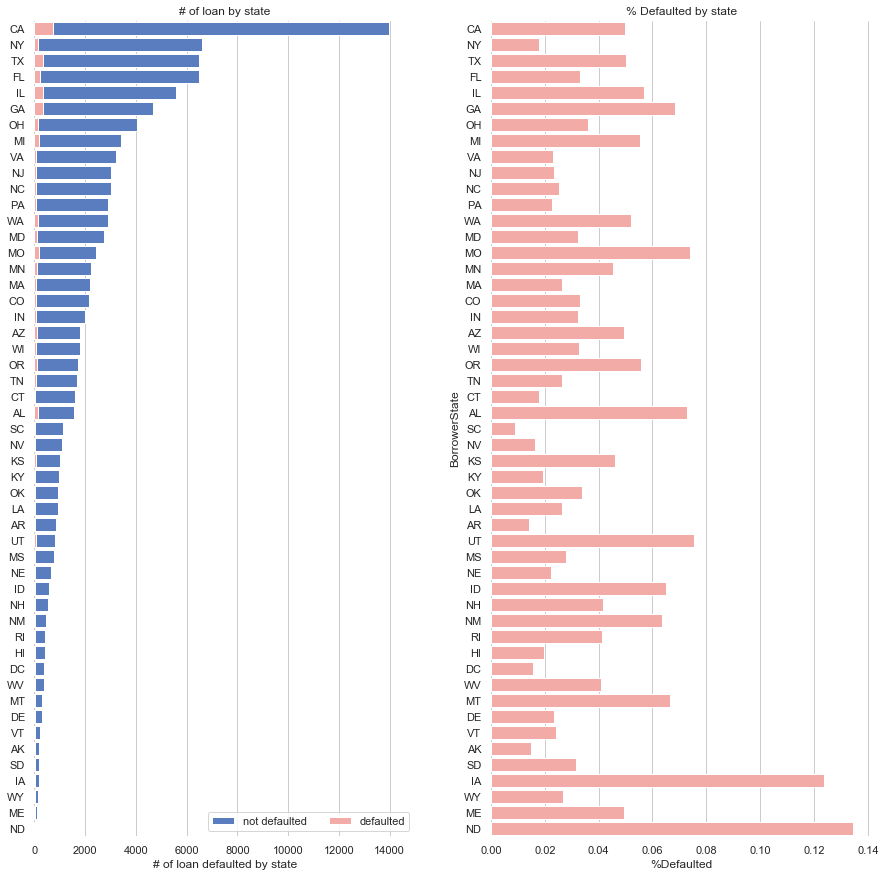

In [8]:
borrow_state = df.groupby(by=['BorrowerState','LoanStatusReview']).count()['ListingKey'].reset_index()

z = borrow_state.pivot(index = 'BorrowerState',columns = 'LoanStatusReview')['ListingKey'].reset_index()

z['%Defaulted'] = z['Defaulted']/(z['Defaulted']+z['not Defaulted'])



f,ax = plt.subplots(ncols = 2, figsize = (15,15))

z = z.sort_values("not Defaulted",ascending = False)

sns.set(style = "whitegrid")

sns.set_color_codes("muted")
sns.barplot(x ="not Defaulted", y="BorrowerState", data = z, label = "not defaulted" ,color = "b", ax = ax[0])

sns.set_color_codes("pastel")
sns.barplot(x="Defaulted",  y="BorrowerState", data=z, label="defaulted", color="r", ax = ax[0])

ax[0].legend(ncol=2, loc="lower right", frameon=True)

ax[0].set(xlim=(0, 15000), ylabel="", xlabel="# of loan defaulted by state")

sns.despine(left=True, bottom=True)
ax[0].set_title("# of loan by state")

sns.set_color_codes("pastel")

sns.barplot(y = 'BorrowerState', x = '%Defaulted', data = z, color = 'r', label = 'Defaulted', ax = ax[1])
plt.title('% Defaulted by state')


## Debt to income ratio contributed to default

The higher debt to income ratio, the higher risk of loan defaulted whatever credit grade.


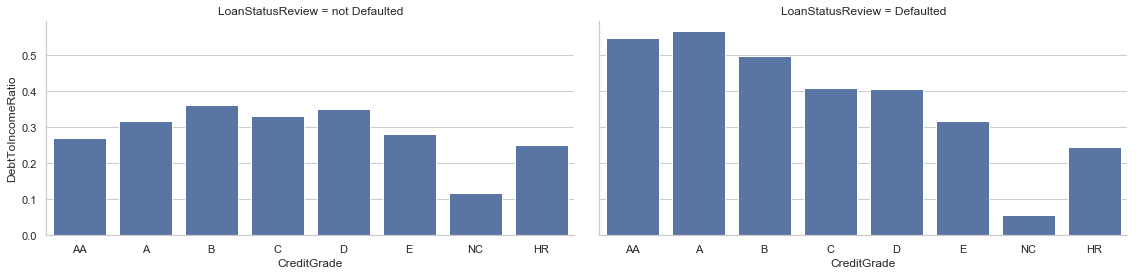

In [10]:
g = sns.FacetGrid(data = df, col = 'LoanStatusReview',size = 4, aspect = 2, margin_titles = True)


g.map(sns.barplot, 'CreditGrade', 'DebtToIncomeRatio', ci = None,  data = df, order = order_by)


## 1 year and 5 year loan term have lower percent of default

3 year loan term has highest percentage of loan default (more than 5%) comparing to 1 year and 5 year loan term which showed <1% of loan default.


(0, 10000)

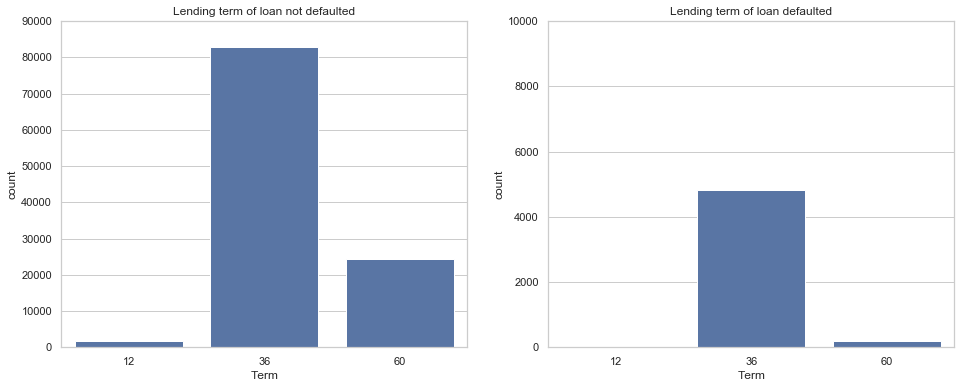

In [13]:
fig, ax = plt.subplots(ncols = 2, figsize = (16,6))

default_color = sns.color_palette()[0]

sns.countplot(df[df['LoanStatusReview']=='not Defaulted'].Term, color = default_color, ax = ax[0])
ax[0].set_title('Lending term of loan not defaulted')
ax[0].set_ylim([0,90000])


sns.countplot(df[df['LoanStatusReview']=='Defaulted'].Term, color = default_color, ax = ax[1])
ax[1].set_title('Lending term of loan defaulted')
ax[1].set_ylim([0,10000])

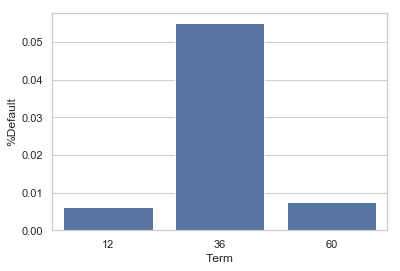

In [14]:
df_Term = df.groupby(by =['Term','LoanStatusReview']).count()['ListingKey'].reset_index()

df_Term = df_Term.pivot(index ='Term',columns ='LoanStatusReview')['ListingKey'].reset_index()

df_Term['%Default'] = df_Term['Defaulted']/(df_Term['Defaulted']+df_Term['not Defaulted'])

sns.barplot(y ='%Default', x = 'Term', data = df_Term, color = default_color)